# Exemple avec SimFin

In [3]:
cd

/Users/juliennavaux


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload 
import sys 
sys.path.append('/Users/juliennavaux/Dropbox (CEDIA)/simfin/Model')
sys.setrecursionlimit(10**6) 
import warnings
import simfin
import pandas as pd
import os
warnings.filterwarnings('ignore')
module_dir = '../'
simfin = reload(simfin)
from scipy.ndimage import gaussian_filter1d as scifilter

In [5]:
x = simfin.simulator(2019,2040)

FileNotFoundError: [Errno 2] No such file or directory: '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/simfin/params/rates.pkl'

In [3]:
%%time
x.simulate()
pop = x.pop
eco = x.eco
print(eco.keys())

pop  = pd.read_pickle('outcomes_profil/simpop.pkl')

# LOAD PROFILES FROM BDSPS
cons_bdsps    = pd.read_pickle('outcomes_profil/cons.pkl')
constax_bdsps = pd.read_pickle('outcomes_profil/cons_taxes.pkl')
earnc_bdsps   = pd.read_pickle('outcomes_profil/earn_c.pkl')
emp_bdsps     = pd.read_pickle('outcomes_profil/emp.pkl')
hoursc_bdsps  = pd.read_pickle('outcomes_profil/hours_c.pkl')
nonwork_bdsps  = pd.read_pickle('outcomes_profil/non_work_taxinc.pkl')
personaltax_bdsps  = pd.read_pickle('outcomes_profil/personal_taxes.pkl')
wage_bdsps  = pd.read_pickle('outcomes_profil/wage.pkl')

Index(['emp', 'earn_c', 'cons', 'hours_c', 'cons_taxes', 'taxinc',
       'personal_taxes'],
      dtype='object')
Wall time: 22.3 s


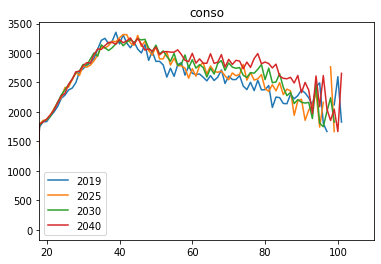

In [4]:

# consumption taxes
for year in [2019,2025,2030,2040]:
    value  = (pop[year].multiply(cons_bdsps*constax_bdsps,fill_value=0.0))
    z = value.groupby(['age']).sum() /  pop[year].groupby(['age']).sum()
    plt.plot(z,label=year)
plt.xlim(18,110)
plt.title('conso')
plt.legend()
plt.savefig('figures/conso.png')
plt.show()


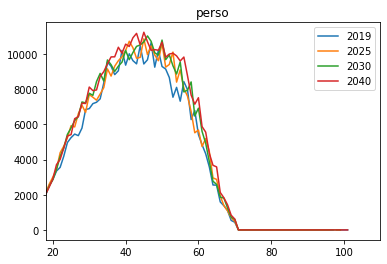

In [5]:
# personal taxes
for year in [2019,2025,2030,2040]:
    value  = (pop[year].multiply(emp_bdsps*earnc_bdsps*personaltax_bdsps,fill_value=0.0))
    z = value.groupby(['age']).sum() /  pop[year].groupby(['age']).sum()
    plt.plot(z,label=year)
plt.xlim(18,110)
plt.title('perso')
plt.legend()
plt.savefig('figures/perso.png')
plt.show()

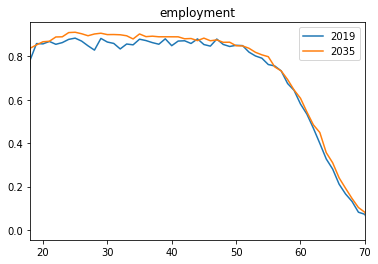

In [6]:
# employment
for year in [2019,2035]:
    value  = (pop[year].multiply(emp_bdsps,fill_value=0.0))
    z = value.groupby(['age']).sum() /  pop[year].groupby(['age']).sum()
    plt.plot(z,label=year)
plt.xlim(18,70)
plt.title('employment')
plt.legend()
plt.savefig('figures/employment.png')
plt.show()

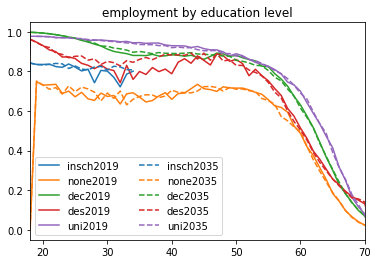

In [7]:
# employment by education

list_educ = ['none','dec','des','uni']
l_style = ['-','--']
i_style = 0

for year in [2019,2035]:
    plt.gca().set_prop_cycle(None)
    value  = (pop[year].multiply(emp_bdsps,fill_value=0.0))
    for insch in [True,False]:
        if insch == True:
            pop2   = pop.drop(False,level='insch')
            value2 = value.drop(False,level='insch')
            z = value2.groupby(['age']).sum() /  pop2[year].groupby(['age']).sum()
            plt.plot(z,label='insch'+str(year),linestyle=l_style[i_style])
        else:
            for educ in list_educ:
                pop2   = pop.drop(True,level='insch')
                value2 = value.drop(True,level='insch')
                for i in list_educ:
                    if i != educ:
                        pop2   = pop2.drop(i,level='educ')
                        value2 = value2.drop(i,level='educ')
                z = value2.groupby(['age']).sum() /  pop2[year].groupby(['age']).sum()
                plt.plot(z,label=educ+str(year),linestyle=l_style[i_style])
    i_style +=1
    
plt.xlim(18,70)
plt.title('employment by education level')
plt.legend(ncol=2)
plt.savefig('figures/employment_by_educ.png')
plt.show()

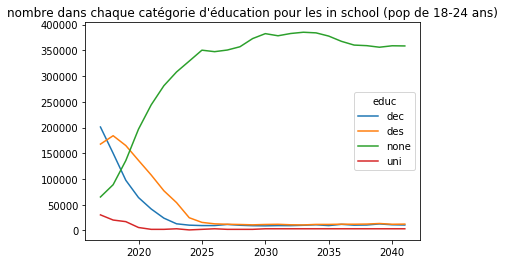

In [8]:
pop2 = pop.drop(False,level='insch')
for i in range(1,18):
    pop2 = pop2.drop(i,level='age')
for i in range(25,111):
    pop2 = pop2.drop(i,level='age')
pop2.groupby(['educ']).sum().transpose().plot()
plt.title("nombre dans chaque catégorie d'éducation pour les in school (pop de 18-24 ans)")
plt.savefig('figures/plot_inschool.png')


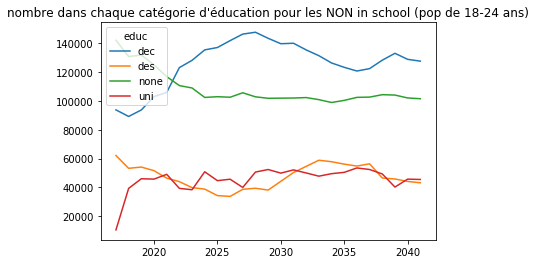

In [9]:
pop2 = pop.drop(True,level='insch')
for i in range(1,18):
    pop2 = pop2.drop(i,level='age')
for i in range(25,111):
    pop2 = pop2.drop(i,level='age')
pop2.groupby(['educ']).sum().transpose().plot()
plt.title("nombre dans chaque catégorie d'éducation pour les NON in school (pop de 18-24 ans)")
plt.savefig('figures/plot_inschool.png')

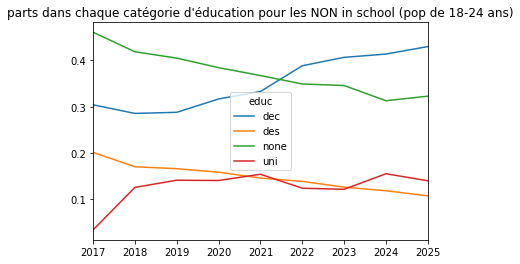

In [10]:
pop2 = pop.drop(True,level='insch')
for i in range(1,18):
    pop2 = pop2.drop(i,level='age')
for i in range(25,111):
    pop2 = pop2.drop(i,level='age')
x = pop2.groupby(['educ']).sum() / pop2.sum()
x.transpose().plot()

plt.xlim(2017,2025)
plt.title("parts dans chaque catégorie d'éducation pour les NON in school (pop de 18-24 ans)")
plt.savefig('figures/plot_inschool.png')

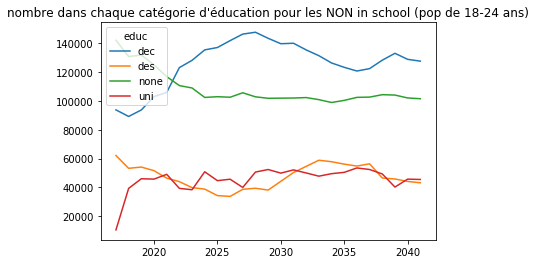

In [11]:
# en parts

pop2 = pop.drop(True,level='insch')
for i in range(1,18):
    pop2 = pop2.drop(i,level='age')
for i in range(25,111):
    pop2 = pop2.drop(i,level='age')
pop2.groupby(['educ']).sum().transpose().plot()
plt.title("nombre dans chaque catégorie d'éducation pour les NON in school (pop de 18-24 ans)")
plt.savefig('figures/plot_inschool.png')


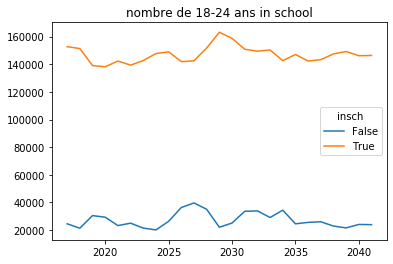

In [44]:
pop2 = pop.copy()
for i in range(0,18):
    pop2 = pop2.drop(i,level='age')
for i in range(20,111):
    pop2 = pop2.drop(i,level='age')    
pop2.groupby(['insch']).sum().transpose().plot()
plt.title("nombre de 18-24 ans in school")
plt.savefig('figures/plot_inschool.png')

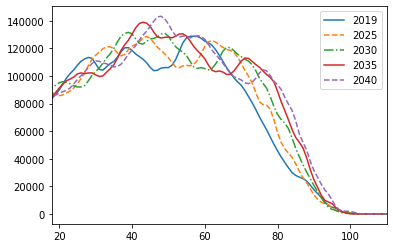

In [13]:
# population composition
style  = ['-','--','-.','-','--']
istyle = 0
for year in [2019,2025,2030,2035,2040]:    
    z = pop[year].groupby(['age']).sum()
    z = scifilter(z,sigma=1.0)
    plt.plot(z,label=year,linestyle=style[istyle])
    istyle +=1
plt.xlim(18,110)
plt.legend()
plt.savefig('figures/pop.png')
plt.show()


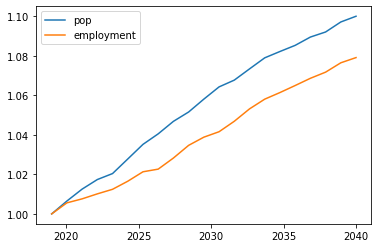

In [14]:
# population size vs employment vs employment times conditional earnings
tax_cons_year = []
tax_cons_year2 = []

xaxis = np.linspace(2019,2040,40-19)

value2019  = (pop[2019].multiply((emp_bdsps),fill_value=0.0))
for year in range(2019,2040):
    tax_cons_year.append( pop[year].sum() / pop[2019].sum())
    value  = (pop[year].multiply(emp_bdsps,fill_value=0.0))
    tax_cons_year2.append( value.sum() / value2019.sum())
    
plt.plot(xaxis,tax_cons_year,label='pop')
plt.plot(xaxis,tax_cons_year2,label='employment')
plt.legend()
plt.show()



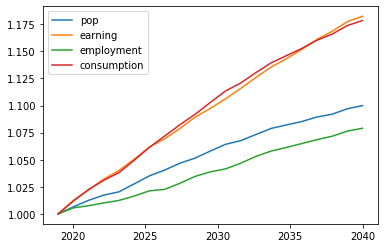

In [15]:
# population size vs employment vs employment times conditional earnings
tax_cons_year = []
tax_cons_year2 = []
tax_cons_year3 = []
tax_cons_year4 = []

value2019  = (pop[2019].multiply((emp_bdsps*earnc_bdsps),fill_value=0.0))
value2019_2  = (pop[2019].multiply((emp_bdsps),fill_value=0.0))
value2019_3  = (pop[2019].multiply((cons_bdsps),fill_value=0.0))


xaxis = np.linspace(2019,2040,40-19)

for year in range(2019,2040):
    tax_cons_year.append( pop[year].sum() / pop[2019].sum())
    value  = (pop[year].multiply((emp_bdsps*earnc_bdsps),fill_value=0.0))
    tax_cons_year2.append( value.sum() / value2019.sum())
    value  = (pop[year].multiply((emp_bdsps),fill_value=0.0))
    tax_cons_year3.append( value.sum() / value2019_2.sum())
    value  = (pop[year].multiply((cons_bdsps),fill_value=0.0))
    tax_cons_year4.append( value.sum() / value2019_3.sum())
    
plt.plot(xaxis,tax_cons_year,label='pop')
plt.plot(xaxis,tax_cons_year2,label='earning')
plt.plot(xaxis,tax_cons_year3,label='employment')
plt.plot(xaxis,tax_cons_year4,label='consumption')
plt.legend()
plt.savefig('figures/growth_all.png')
plt.show()

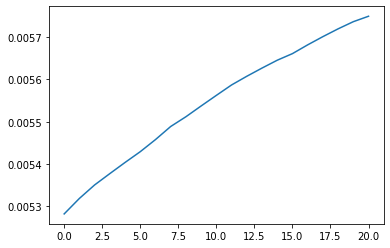

In [16]:
# consumption tax divided by population size
tax_cons_year = []

for year in range(2019,2040):
    value  = (pop[year].multiply(eco['cons']*eco['cons_taxes'],fill_value=0.0))
    tax_cons_year.append(value.sum() / pop[year].sum())
    
plt.plot(tax_cons_year)
plt.show()

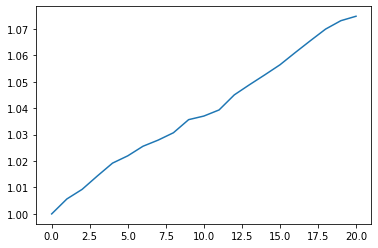

In [17]:
# personal tax divided by population size
tax_cons_year = []
for year in range(2019,2040):
    value  = (pop[year].multiply((eco['emp']*eco['earn_c']),fill_value=0.0))
    tax_cons_year.append(value.sum() / pop[year].sum())
plt.plot(tax_cons_year/tax_cons_year[0])
plt.show()

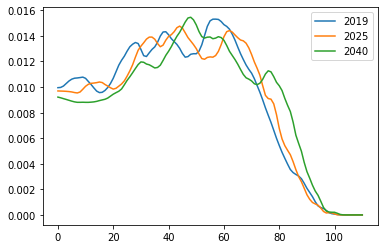

In [18]:
# population composition
for year in [2019,2025,2040]:    
    z = pop[year].groupby(['age']).sum() /  pop[year].sum()
    z = scifilter(z,sigma=1.0)
    plt.plot(z,label=year) 

plt.legend()
plt.show()

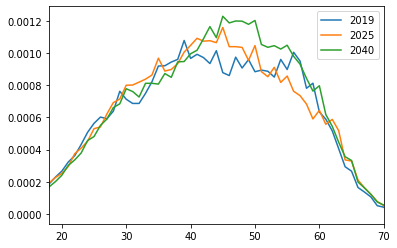

In [19]:
# population composition
for year in [2019,2025,2040]:    
    value  = (pop[year].multiply((eco['emp']*eco['earn_c']),fill_value=0.0))
    z = value.groupby(['age']).sum() / pop[year].sum()
    plt.plot(z,label=year) 

plt.xlim(18,70)
plt.legend()
plt.show()

In [20]:
x = simfin.simulator(2019,2040)
x.simulate()
x1 = x.summary.values[-1]
x.summary


non_work/earnings : 0.23242962617970825
alignment factor for consommation :  1.710345397610546
alignment factor for consommation tax :  0.6673979857580628
alignment factor for personal tax :  0.5622675102692803
alignment factor for health :  1.2274265893758673
alignment factor for education :  1.3692872256508084


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
personal,31773,32895.5,34007.6,35091.6,36108.5,37274.3,38494.8,39666.4,40829.6,42013.7,...,44489.8,45719.8,47018.4,48337.1,49604.9,50913.4,52335.8,53680.8,55133.3,56442.8
corporate,9183,9494.25,9791.65,10100.3,10398.5,10727.6,11076,11398.9,11746.6,12111.5,...,12837.4,13228,13634.6,14050.4,14448.5,14867.3,15311.2,15743.4,16205.3,16626.2
consumption,21001,21655,22297.1,22908.3,23491.3,24186.7,24915.9,25624.9,26339.9,27044.5,...,28587.4,29286.1,30058.4,30843.1,31560.8,32320.7,33124.3,33890.1,34743.2,35521.5
other taxes,29669,30674.6,31635.5,32632.8,33596.2,34659.3,35784.9,36828.2,37951.8,39130.7,...,41475.8,42737.9,44051.5,45394.8,46681.2,48034.1,49468.3,50864.6,52357.1,53716.8
autonomous,91626,94719.4,97731.8,100733,103595,106848,110272,113518,116868,120300,...,127390,130972,134763,138625,142295,146136,150240,154179,158439,162307
federal transfers,23120,23903.6,24652.4,25429.6,26180.3,27008.7,27885.9,28698.9,29574.5,30493.2,...,32320.6,33304.1,34327.8,35374.5,36377,37431.3,38548.9,39637,40800,41859.6
total revenue,114746,118623,122384,126163,129775,133857,138158,142217,146442,150794,...,159711,164276,169091,174000,178673,183567,188789,193816,199239,204167
mission health,41522,43389.6,45200.4,46941.9,48205.6,50878.7,53648.9,56138.5,58871.8,61191,...,67463.1,69961.4,73215.8,76459.8,79623.7,82414.9,86082,89573.8,93982,97234.2
mission education,23887,24366.3,24952.8,25307.8,25792.2,26206.4,26605.4,26909.8,27623.3,28391,...,30093.4,30871.3,31740.8,32717.5,33770.9,34550.4,35204.9,36158,37101.8,38340.6
other missions,32335,33431,34478.2,35565.1,36615.1,37773.7,39000.5,40137.5,41362.1,42646.9,...,45202.7,46578.3,48009.9,49473.8,50875.9,52350.4,53913.5,55435.2,57061.8,58543.7


In [21]:
x = simfin.simulator(2019,2040)
x.simulate()

non_work/earnings : 0.23242962617970825
alignment factor for consommation :  1.710345397610546
alignment factor for consommation tax :  0.6673979857580628
alignment factor for personal tax :  0.5622675102692803
alignment factor for health :  1.2274265893758673
alignment factor for education :  1.3692872256508084


In [22]:
print((x.summary.loc['consumption',2039]-x.summary.loc['consumption',2019])/x.summary.loc['consumption',2019])
print((x.summary.loc['personal',2039]-x.summary.loc['personal',2019])/x.summary.loc['personal',2019])
print((x.summary.loc['mission health',2039]-x.summary.loc['mission health',2019])/x.summary.loc['mission health',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])
print((x.summary.loc['mission education',2039]-x.summary.loc['mission education',2019])/x.summary.loc['mission education',2019])
print((x.summary.loc['total spending',2039]-x.summary.loc['total spending',2019])/x.summary.loc['total spending',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])


0.6914201559308998
0.7764390654799782
1.3417512723167215
0.8105359814035171
0.6050825338413676
0.8322561780132962
0.8105359814035171


In [23]:
history = pd.read_excel(module_dir+'/simfin/params/historical_accounts.xlsx',sheet_name='Inputs')
history = history.set_index('account')

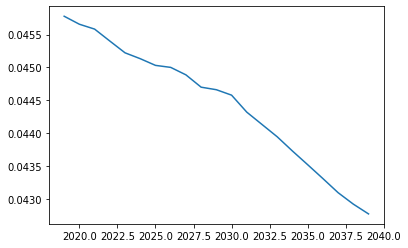

In [24]:
plt.plot(x.summary.loc['consumption',:]/x.summary.loc['gdp',:])


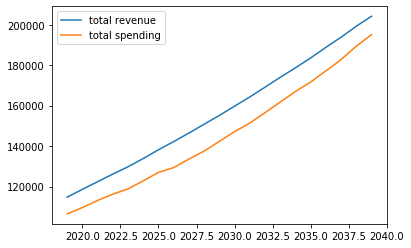

In [25]:





x.summary.loc[['total revenue','total spending'],:].T.plot()


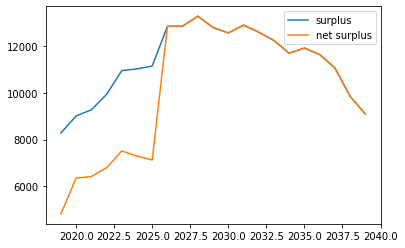

In [26]:

x.summary.loc[['surplus','net surplus'],:].T.plot()

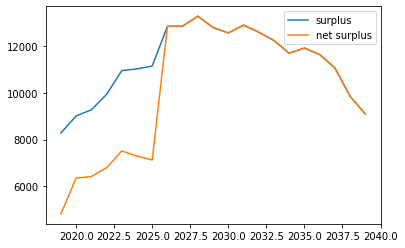

In [27]:
x.summary.loc[['surplus','net surplus'],:].T.plot()

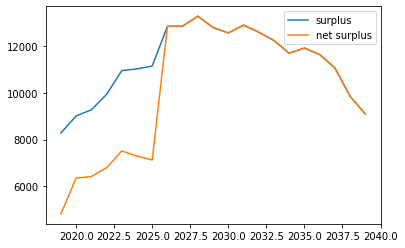

In [28]:
x.summary.loc[['surplus','net surplus'],:].T.plot()

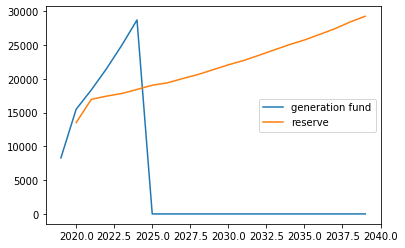

In [29]:
x.summary.loc[['generation fund','reserve'],:].T.plot()

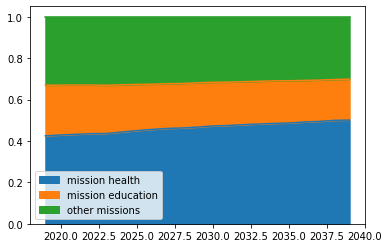

In [30]:
missions = x.summary.loc[['mission health','mission education','other missions'],:].T
tot = missions.sum(axis=1)
for c in missions.columns:
    missions[c] = missions[c]/tot
missions.plot.area()

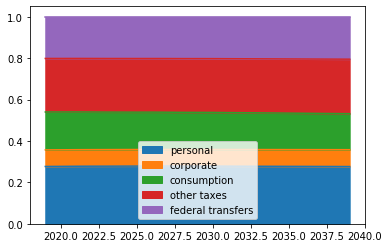

In [31]:
revenue = x.summary.loc[['personal','corporate','consumption','other taxes','federal transfers'],:].T
tot = revenue.sum(axis=1)
for c in revenue.columns:
    revenue[c] = revenue[c]/tot
revenue.plot.area()


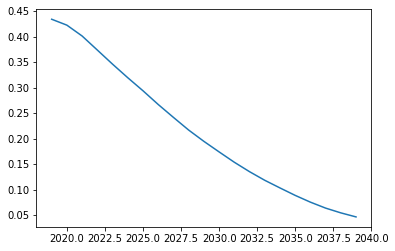

In [32]:
x.summary.loc['debt-to-gdp',:].plot()

In [33]:
print((x.summary.loc['consumption',2039]-x.summary.loc['consumption',2019])/x.summary.loc['consumption',2019])
print((x.summary.loc['personal',2039]-x.summary.loc['personal',2019])/x.summary.loc['personal',2019])
print((x.summary.loc['mission health',2039]-x.summary.loc['mission health',2019])/x.summary.loc['mission health',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])
print((x.summary.loc['mission education',2039]-x.summary.loc['mission education',2019])/x.summary.loc['mission education',2019])
print((x.summary.loc['total spending',2039]-x.summary.loc['total spending',2019])/x.summary.loc['total spending',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])

0.6914201559308998
0.7764390654799782
1.3417512723167215
0.8105359814035171
0.6050825338413676
0.8322561780132962
0.8105359814035171


In [34]:
x = simfin.simulator(2019,2040)
x.load_params(file_profiles='/simfin/params/no_educ/')
x.init_revenue()
x.init_transfers()
x.init_missions()
x.init_gfund()
x.init_reserve()
x.init_debt()
x.simulate()

non_work/earnings : 0.23242962617970825
alignment factor for consommation :  1.710345397610546
alignment factor for consommation tax :  0.6673979857580628
alignment factor for personal tax :  0.5622675102692803
alignment factor for health :  1.2274265893758673
alignment factor for education :  1.3692872256508084
non_work/earnings : 0.2276506388408591
alignment factor for consommation :  1.7297542304988862
alignment factor for consommation tax :  0.6742535090037977
alignment factor for personal tax :  0.5864704028398393
alignment factor for health :  1.2274265893758673
alignment factor for education :  1.3692872256508084


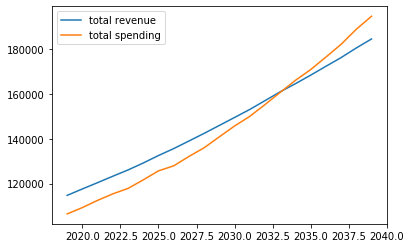

In [35]:
x.summary.loc[['total revenue','total spending'],:].T.plot()
plt.legend()
plt.savefig('figures/revenue_spending.png')

In [36]:
print((x.summary.loc['consumption',2039]-x.summary.loc['consumption',2019])/x.summary.loc['consumption',2019])
print((x.summary.loc['personal',2039]-x.summary.loc['personal',2019])/x.summary.loc['personal',2019])
print((x.summary.loc['mission health',2039]-x.summary.loc['mission health',2019])/x.summary.loc['mission health',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])
print((x.summary.loc['mission education',2039]-x.summary.loc['mission education',2019])/x.summary.loc['mission education',2019])
print((x.summary.loc['total spending',2039]-x.summary.loc['total spending',2019])/x.summary.loc['total spending',2019])
print((x.summary.loc['gdp',2039]-x.summary.loc['gdp',2019])/x.summary.loc['gdp',2019])

0.5697527919770028
0.5917463154985174
1.3417512723167215
0.630547454931482
0.6050825338413676
0.8289586812353721
0.630547454931482


In [37]:
x2 = x.summary.values[-1]

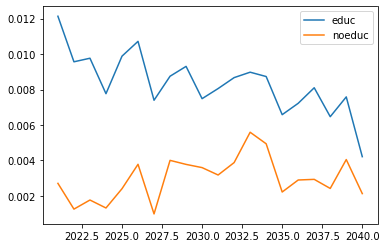

In [38]:
xaxis = np.linspace(2020,2040,21)
plt.plot(xaxis,x1,label='educ')
plt.plot(xaxis,x2,label='noeduc')
plt.legend()
plt.savefig('figures/growth_emploment.png')